# Machine Learning Tutorial - Absenteeism at Work 

In [1]:
#Dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# Load Data 

In [3]:
modified_data=pd.read_csv('Absenteeism_at_work_modified2.csv')

# Clean Data

In [5]:
#Seperate into two seperate categories to change the datatype
categorical_set = ["Reason for absence","Month of absence","Disciplinary failure","Social drinker","Social smoker"]

numerical_set = ["ID","Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Son","Pet","Height","Body mass index","Absenteeism time in hours"]

## Converting categorical_set data into category types 
for i in categorical_set :
    modified_data[i] = modified_data[i].astype("category")

for i in numerical_set :
    modified_data[i] = modified_data[i].astype("float64")  

In [6]:
modified_data.head()

,ID,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Thursday,Friday,2007,2008,2009,2010,Education1,Education2,Education3,Education4
0,11.0,26.0,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,23.0,7.0,179.0,51.0,18.0,38.0,239554.0,97.0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,7.0,7.0,7.0,279.0,5.0,14.0,39.0,239554.0,97.0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,11.0,23.0,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.0,23.0,7.0,179.0,51.0,18.0,38.0,239554.0,97.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
modified_data.shape

(696, 30)

# Fit Data in to (X,y)

In [8]:
X = modified_data.drop("Absenteeism time in hours", axis=1)
y = modified_data["Absenteeism time in hours"]
print(X.shape, y.shape)

(696, 29) (696,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
X_train.shape

(556, 29)

# Normalize Data Using Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# sklearn.preprocessing import MinMaxScaler

#scalarX= MinMaxScaler().fit(X_train)

#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [ ]:
#train_stats = X_train.describe()
#train_stats = train_stats.transpose()

In [ ]:
#def norm(x):
#  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
#X_train_normed= norm(X_train)
#X_test_normed = norm(X_test)

# Linear Regression Model 1

In [12]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [13]:
model1.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
y_predicted = model1.predict(X_test_scaled)
y_predicted = np.round_(y_predicted,0)

In [14]:
# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R squared (R2 ): {r2}")

Mean Squared Error (MSE): 126.57857142857142
R squared (R2 ): 0.09274452333194982


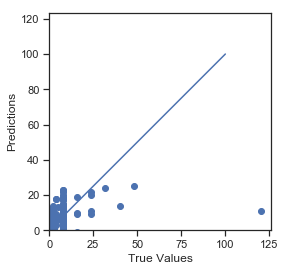

In [15]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Decision Tree Model 2

In [16]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()

In [17]:
model2.fit(X_train_scaled, y_train)

# Use our model to predict a value
y_predicted = model2.predict(X_test_scaled)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 311.04285714285714
R-squared (R2 ): -1.229408441227183


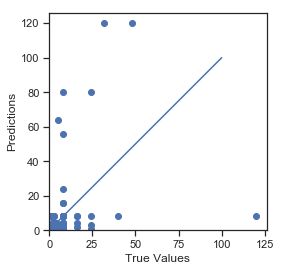

In [18]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Random Forest Model 3 (n_estimators=100)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier(n_estimators=100)

C:\Users\aruba\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
model3.fit(X_train_scaled, y_train)


# Use our model to predict a value
y_predicted = model3.predict(X_test_scaled)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 177.81428571428572
R-squared (R2 ): -0.27448890221626554


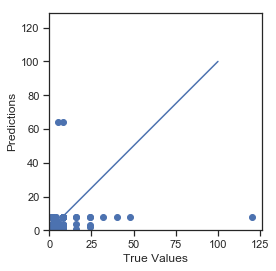

In [21]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Deep Learning Models Using Keras Model 4

In [23]:
# define and fit the final model
model4 = Sequential()

In [24]:
model4.add(Dense(29, input_dim=29, activation='relu'))
model4.add(Dense(19, activation='relu'))
model4.add(Dense(1, activation='linear'))

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
model4.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model4.fit(X_train_scaled, y_train, epochs=1000, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [26]:
# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
y_predicted = model4.predict(X_test_scaled)
y_predicted = np.round_(y_predicted,0)

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

loss, mae, mse = model4.evaluate(X_test_scaled, y_test, verbose=0)

print("Mean Absulte Error: {:5.2f}".format(mae))
print(f"Mean Squared Error (MSE): {mse}")
print(f"R squared (R2 ): {r2}")

Mean Absulte Error:  9.09
Mean Squared Error (MSE): 304.20437709263393
R squared (R2 ): -1.18153959236512


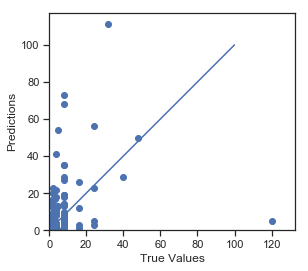

In [27]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])